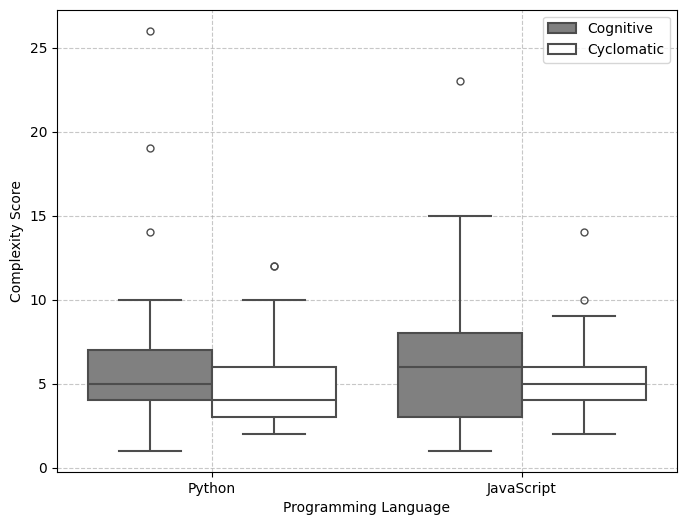

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "complexity_results.csv"

df = pd.read_csv(
    file_path,
    skiprows=2,  
    header=None, 
    names=[
        "Unused", 
        "Number", 
        "Question", 
        "Python_Cognitive", 
        "JavaScript_Cognitive",
        "Python_Cyclomatic", 
        "JavaScript_Cyclomatic"
    ]
)

df.drop(columns=["Unused"], inplace=True)

df_melted = df.melt(
    id_vars=["Number", "Question"], 
    value_vars=[
        "Python_Cognitive", 
        "JavaScript_Cognitive",
        "Python_Cyclomatic", 
        "JavaScript_Cyclomatic"
    ],
    var_name="Metric", 
    value_name="Complexity"
)

df_melted["Type"] = df_melted["Metric"].apply(
    lambda x: "Cognitive" if "Cognitive" in x else "Cyclomatic"
)

df_melted["Language"] = df_melted["Metric"].replace({
    "Python_Cognitive": "Python",
    "JavaScript_Cognitive": "JavaScript",
    "Python_Cyclomatic": "Python",
    "JavaScript_Cyclomatic": "JavaScript"
})

plt.figure(figsize=(8, 6))
sns.boxplot(
    x="Language",
    y="Complexity",
    hue="Type",
    data=df_melted,
    palette=["gray", "white"],
    linewidth=1.5,
    fliersize=5
)

plt.xlabel("Programming Language")
plt.ylabel("Complexity Score")
plt.legend(title="", loc="upper right", fontsize=10, frameon=True)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

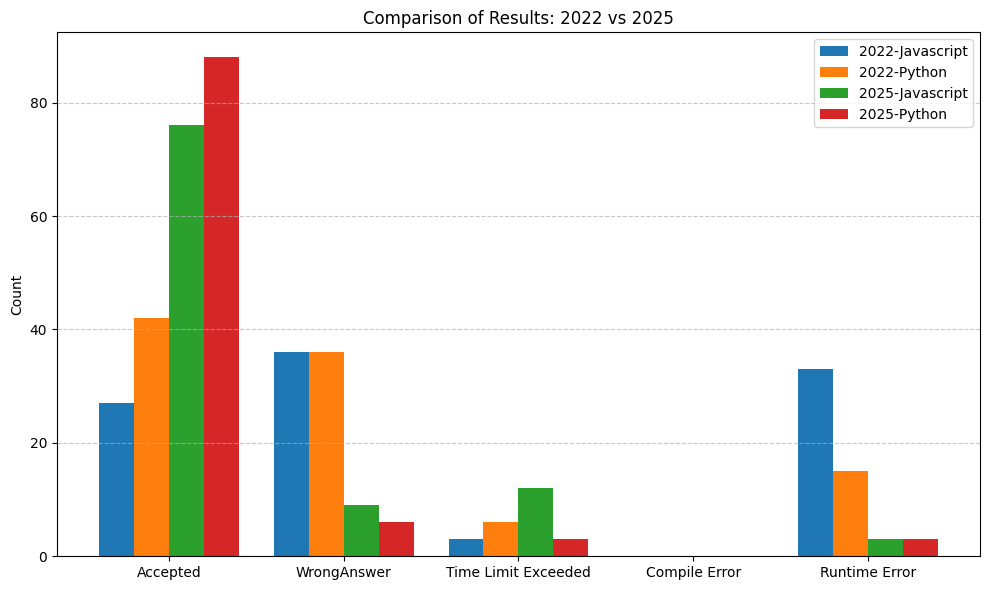

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Prepare your data
data = {
    "Outcome": [
        "Accepted",
        "WrongAnswer",
        "Time Limit Exceeded",
        "Compile Error",
        "Runtime Error"
    ],
    "2022-Javascript": [27, 36, 3, 0, 33],
    "2022-Python":     [42, 36, 6, 0, 15],
    "2025-Javascript": [76,  9, 12, 0,  3],
    "2025-Python":     [88,  6,  3, 0,  3]
}

df = pd.DataFrame(data)

# 2) Create positions on the X-axis for each outcome
x = np.arange(len(df["Outcome"]))  # [0, 1, 2, 3, 4]
width = 0.2  # The width of each bar

# 3) Build the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# 4) Plot each group of bars
rects1 = ax.bar(x - 1.5*width, df["2022-Javascript"], width, label="2022-Javascript")
rects2 = ax.bar(x - 0.5*width, df["2022-Python"],     width, label="2022-Python")
rects3 = ax.bar(x + 0.5*width, df["2025-Javascript"], width, label="2025-Javascript")
rects4 = ax.bar(x + 1.5*width, df["2025-Python"],     width, label="2025-Python")

# 5) Customize the chart
ax.set_ylabel("Count")
ax.set_title("Comparison of Results: 2022 vs 2025")
ax.set_xticks(x)
ax.set_xticklabels(df["Outcome"], rotation=0)  # Rotate labels if needed
ax.legend()

# Add a grid on the Y-axis
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

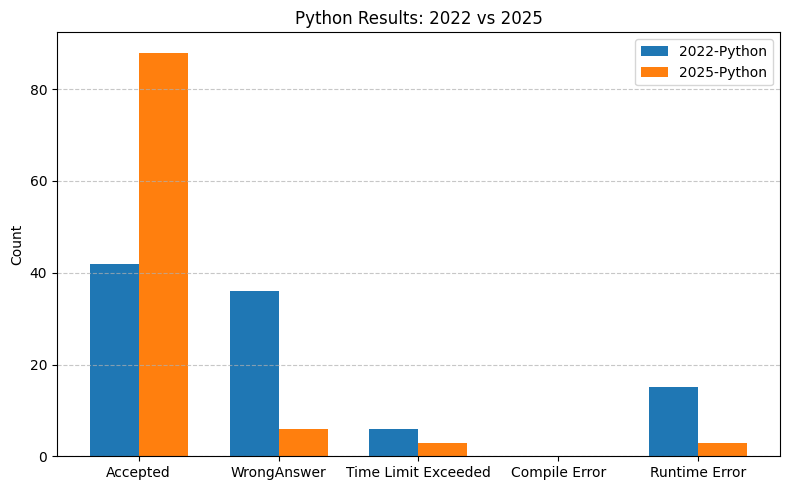

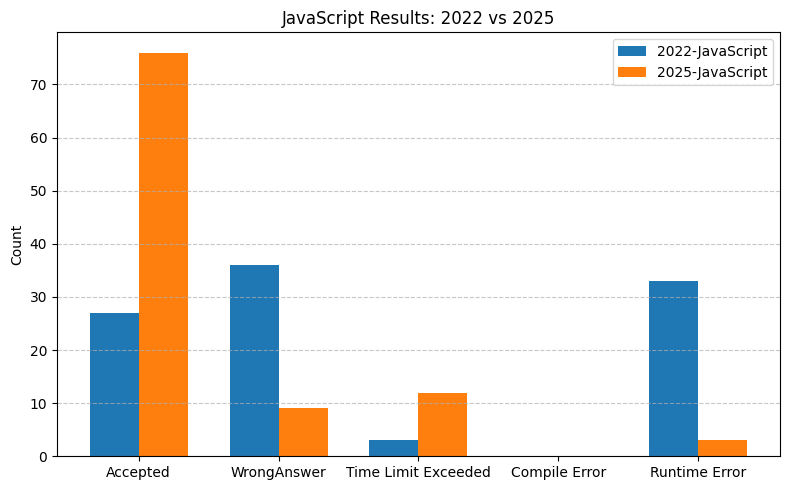

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Define your outcomes
outcomes = [
    "Accepted",
    "WrongAnswer",
    "Time Limit Exceeded",
    "Compile Error",
    "Runtime Error"
]

# 2) Data for Python
python_2022 = [42, 36, 6, 0, 15]
python_2025 = [88, 6,  3, 0,  3]

# 3) Data for JavaScript
js_2022 = [27, 36, 3, 0, 33]
js_2025 = [76,  9, 12, 0,  3]

# 4) Create the first bar chart (Python)
x = np.arange(len(outcomes))
width = 0.35  # width of each bar

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, python_2022, width, label="2022-Python")
plt.bar(x + width/2, python_2025, width, label="2025-Python")

plt.xticks(x, outcomes, rotation=0)
plt.ylabel("Count")
plt.title("Python Results: 2022 vs 2025")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 5) Create the second bar chart (JavaScript)
x = np.arange(len(outcomes))  # reuse same outcomes
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, js_2022, width, label="2022-JavaScript")
plt.bar(x + width/2, js_2025, width, label="2025-JavaScript")

plt.xticks(x, outcomes, rotation=0)
plt.ylabel("Count")
plt.title("JavaScript Results: 2022 vs 2025")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

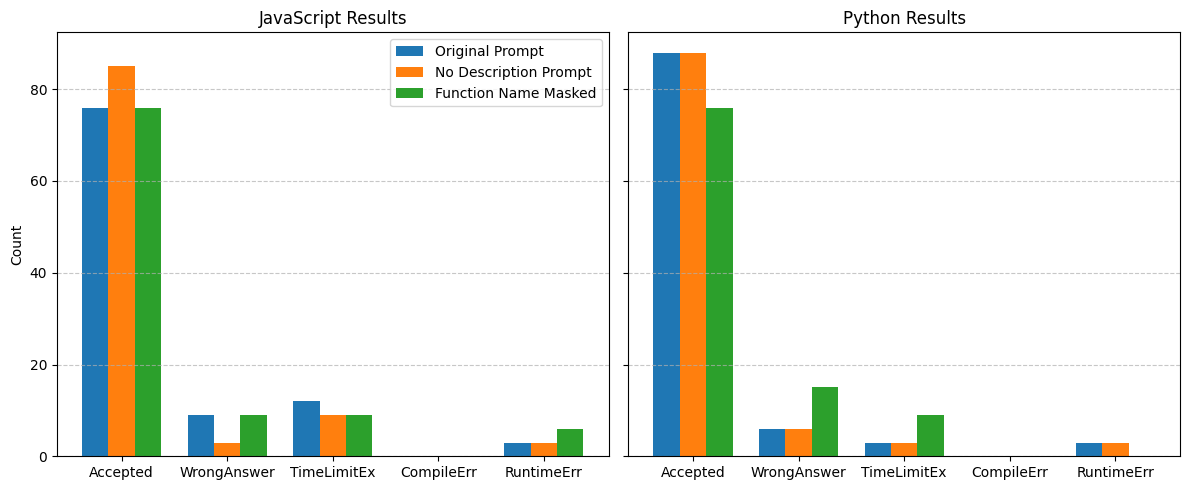

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Define the outcomes (X-axis labels)
outcomes = ["Accepted", "WrongAnswer", "TimeLimitEx", "CompileErr", "RuntimeErr"]

# 2) Data for JavaScript
js_original = [76, 9, 12, 0, 3]
js_no_desc =  [85, 3,  9,  0, 3]
js_masked =   [76, 9,  9,  0, 6]

# 3) Data for Python
py_original = [88, 6, 3,  0, 3]
py_no_desc =  [88, 6, 3,  0, 3]
py_masked =   [76, 15, 9, 0, 0]

# 4) Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True)

# Shared X positions for all bars
x = np.arange(len(outcomes))
width = 0.25  # width of each bar

# --- LEFT SUBPLOT (JavaScript) ---
axes[0].bar(x - width, js_original, width, label="Original Prompt")
axes[0].bar(x,         js_no_desc,  width, label="No Description Prompt")
axes[0].bar(x + width, js_masked,   width, label="Function Name Masked")

axes[0].set_title("JavaScript Results")
axes[0].set_xticks(x)
axes[0].set_xticklabels(outcomes, rotation=0)
axes[0].set_ylabel("Count")
axes[0].legend()
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# --- RIGHT SUBPLOT (Python) ---
axes[1].bar(x - width, py_original, width, label="Original Prompt")
axes[1].bar(x,         py_no_desc,  width, label="No Description Prompt")
axes[1].bar(x + width, py_masked,   width, label="Function Name Masked")

axes[1].set_title("Python Results")
axes[1].set_xticks(x)
axes[1].set_xticklabels(outcomes, rotation=0)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# 5) Adjust layout and show
plt.tight_layout()
plt.show()

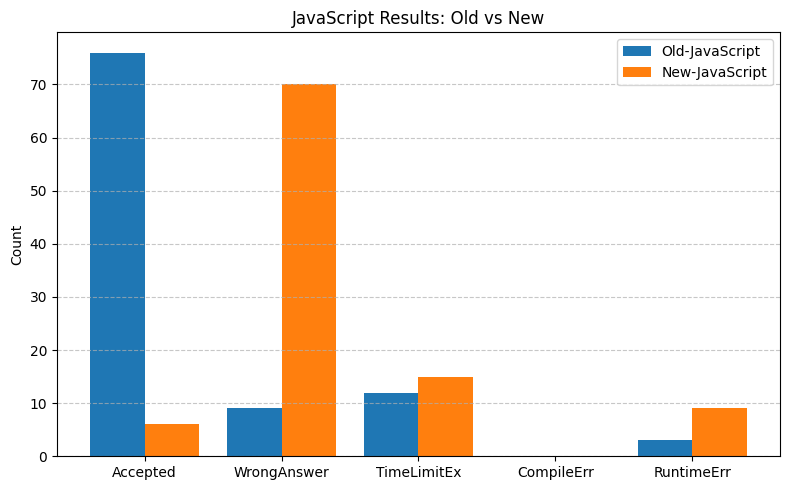

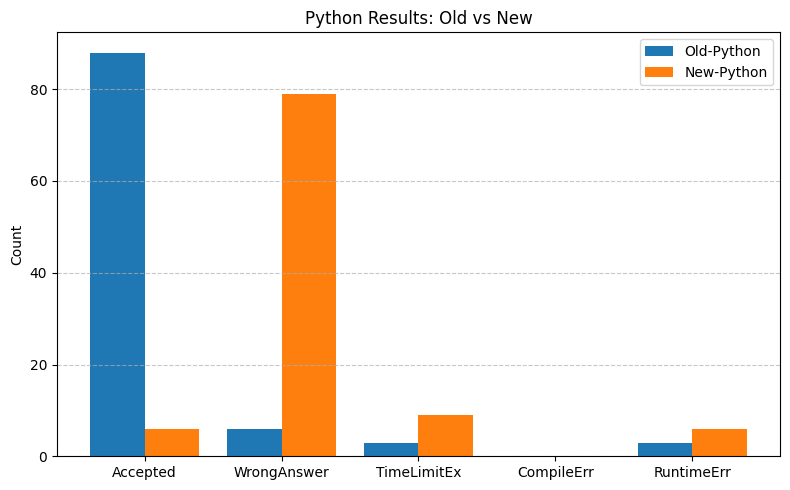

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Define the outcomes (X-axis labels)
outcomes = ["Accepted", "WrongAnswer", "TimeLimitEx", "CompileErr", "RuntimeErr"]

# 2) Data for Old vs New
old_js = [76, 9, 12, 0, 3]
new_js = [6, 70, 15, 0, 9]

old_py = [88, 6, 3, 0, 3]
new_py = [6, 79, 9, 0, 6]

# X positions and bar width
x = np.arange(len(outcomes))  # e.g. [0,1,2,3,4]
width = 0.4

# --- 3) JavaScript Bar Chart ---
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, old_js, width, label="Old-JavaScript")
plt.bar(x + width/2, new_js, width, label="New-JavaScript")

plt.xticks(x, outcomes)
plt.ylabel("Count")
plt.title("JavaScript Results: Old vs New")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# --- 4) Python Bar Chart ---
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, old_py, width, label="Old-Python")
plt.bar(x + width/2, new_py, width, label="New-Python")

plt.xticks(x, outcomes)
plt.ylabel("Count")
plt.title("Python Results: Old vs New")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()